<a href="https://colab.research.google.com/github/egioia92/Machine-Learning/blob/main/Unsupervised%20Multivariate%20Methods/Cluster_Analysis_Assignment_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster Analysis
Marketing team of ABC Bank is running a campaign for credit card on the existing customers. Marketing team wants to understand the segments of the customers to target based on the Minimum and Maximum Balances, Monthly Income, age of the customer, association of the customer with bank (in years).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.preprocessing

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# 1. Import Customer data in R
data = pd.read_csv("/content/Customer data.csv")
data

,Cust_Id,City,age,MonthlyIncome,MinBal,MaxBal,Age with Bank
0,10015,Mumbai,27,12880,2742,11425,1
1,10016,Pune,25,11612,2982,12370,1
2,10017,Mumbai,28,15614,3510,14144,1
3,10018,Mumbai,29,19278,4088,10179,1
4,10019,Nashik,27,15281,4134,10051,1
...,...,...,...,...,...,...,...
80076,10068,Mumbai,25,10616,4746,12522,1
80077,10069,Pune,26,13604,3693,11665,1
80078,10070,Mumbai,27,19609,2972,10628,1
80079,10071,Mumbai,26,17764,2545,13627,1


In [ ]:
# 2. Subset the data excluding Customer id and City.
data.drop(['Cust_Id','City'],axis = 1,inplace = True)
data

,age,MonthlyIncome,MinBal,MaxBal,Age with Bank
0,27,12880,2742,11425,1
1,25,11612,2982,12370,1
2,28,15614,3510,14144,1
3,29,19278,4088,10179,1
4,27,15281,4134,10051,1
...,...,...,...,...,...
80076,25,10616,4746,12522,1
80077,26,13604,3693,11665,1
80078,27,19609,2972,10628,1
80079,26,17764,2545,13627,1


In [ ]:
# 3. Scale the variables.
data_scaled = sklearn.preprocessing.scale(data)
data_scaled

array([[-1.02490699, -1.08841875, -1.09665   , -1.13137533, -1.08835712],
       [-1.18740263, -1.1309536 , -1.08108226, -1.07999136, -1.08835712],
       [-0.94365916, -0.99670717, -1.04683322, -0.98353088, -1.08835712],
       ...,
       [-1.02490699, -0.86269556, -1.08173091, -1.17471186, -1.08835712],
       [-1.10615481, -0.92458578, -1.10942852, -1.01164253, -1.08835712],
       [-1.10615481, -1.0783553 , -1.06940645, -1.00223573, -1.08835712]])

In [ ]:
# 4. Run kmeans on the scaled variable with 3 clusters.
CL = KMeans(n_clusters=3,random_state=3425)
CL.fit(data_scaled)

# Compute centroids
centroids = CL.cluster_centers_
centroids

array([[ 1.2474147 ,  1.24464277,  1.31892019,  1.23693031,  1.18684705],
       [-1.02399696, -1.10118542, -1.03164412, -1.07034153, -1.08821948],
       [-0.17574152, -0.09578118, -0.23693494, -0.11924004, -0.05311442]])

In [ ]:
segment = pd.DataFrame(CL.labels_)
customers = data.assign(segment = segment)
customers['segment'] = customers['segment']+1
customers.head()

,age,MonthlyIncome,MinBal,MaxBal,Age with Bank,segment
0,27,12880,2742,11425,1,2
1,25,11612,2982,12370,1,2
2,28,15614,3510,14144,1,2
3,29,19278,4088,10179,1,2
4,27,15281,4134,10051,1,2


<Axes: xlabel='Dim1', ylabel='Dim2'>

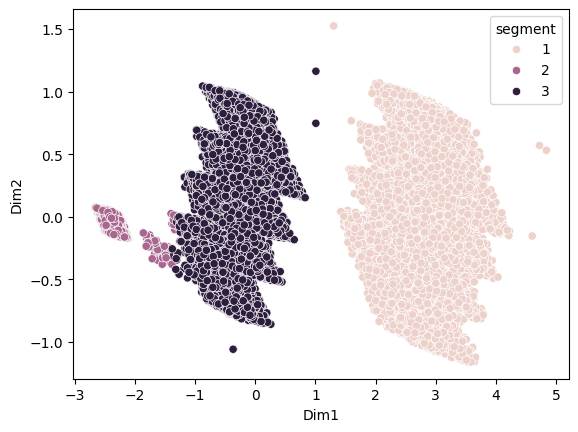

In [ ]:
pca = PCA().fit(data_scaled)
val = PCA().fit_transform(data_scaled)
pca_df = pd.DataFrame(val)
pca_df = pca_df[[0,1]]
pca_df.columns = ['Dim1','Dim2']
finaldata = pd.concat([customers,pca_df],axis = 1)
sns.scatterplot(x='Dim1', y='Dim2', hue='segment', data=finaldata)

In [ ]:
# 5. Obtain mean of original variables for each cluster.
seg_analysis = customers.groupby('segment')[['age', 'MonthlyIncome', 'MinBal', 'MaxBal',
       'Age with Bank']].mean().reset_index().round(2) # Changed tuple to list
seg_analysis

,segment,age,MonthlyIncome,MinBal,MaxBal,Age with Bank
0,1,54.97,82430.55,39981.62,54980.39,6.5
1,2,27.01,12499.41,3744.16,12547.47,1.0
2,3,37.45,42471.37,15995.79,30039.13,3.5


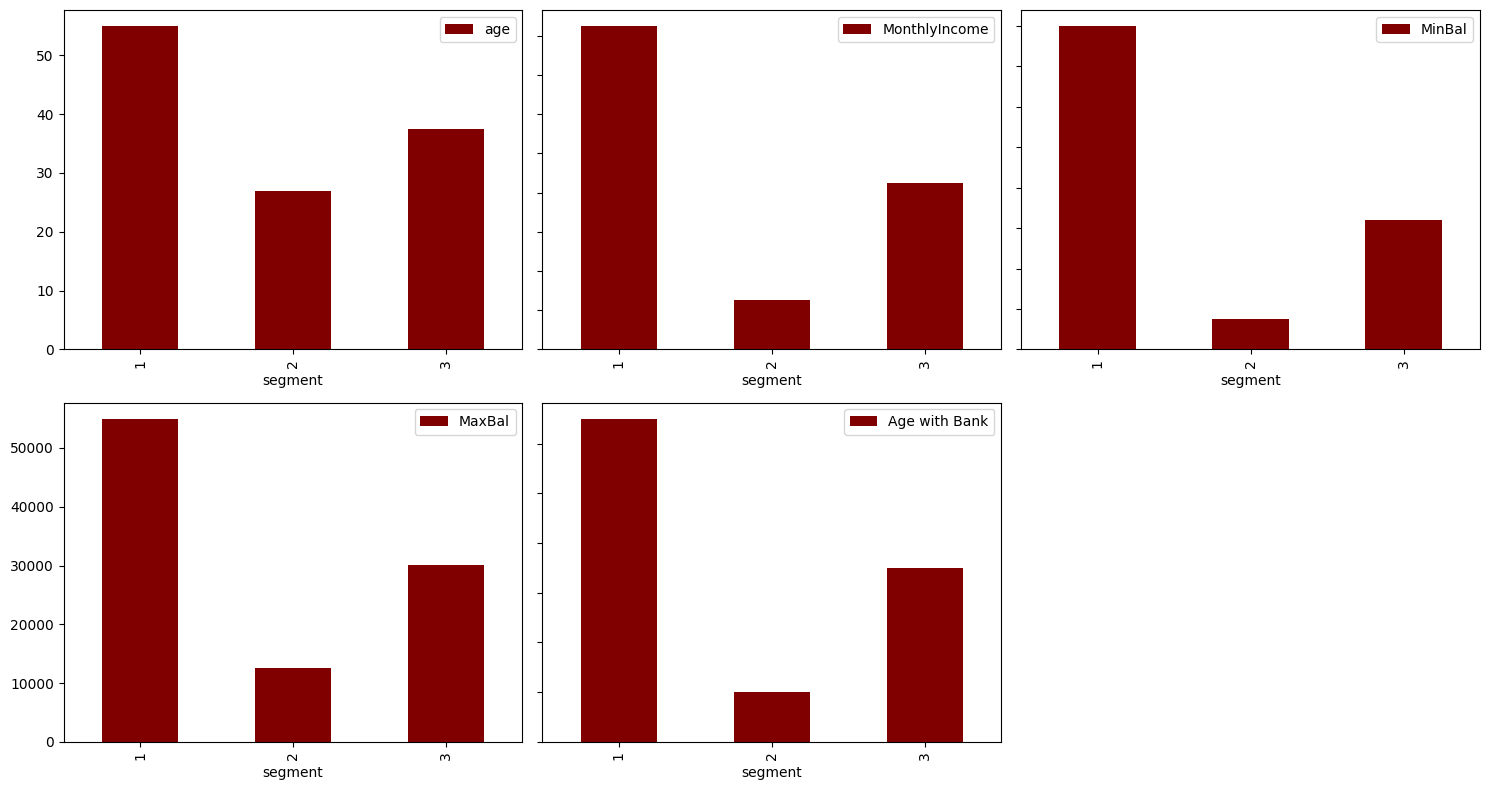

In [ ]:
# 6. Interpret the clusters.
col_list=['age', 'MonthlyIncome', 'MinBal', 'MaxBal', 'Age with Bank']

# Now create a figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
axe = axes.ravel()

# Now plot each zone on a particular axis
for i, cols in enumerate(col_list):
    seg_analysis.plot.bar('segment',cols,color = 'maroon',ax=axe[i],sharey=True )

# Remove the empty subplot
fig.delaxes(axes.flatten()[5])

plt.tight_layout()
plt.show()

Cluster 2 seems to represent a segment of older, high-income, high-balance, high fedelity individuals. This makes it a prime target for high-end credit cards.

Cluster 1, seems for younger and with lower income and balances, less years with the bank.

Cluster 3, potentially consisting of mid-aged, lower-income customers with lower balances and low fedelity.


Cluster 2 should be prioritized for premium product offerings with higher limits and exclusive perks.

Cluster 1 could benefit from products targeting younger demographics, possibly with social benefits like cashback on dining or entertainment.

Cluster 3 could be targeted with versatile cards that combine rewards with moderate interest rates, appealing to individuals who may prioritize a balance of affordability and perks.


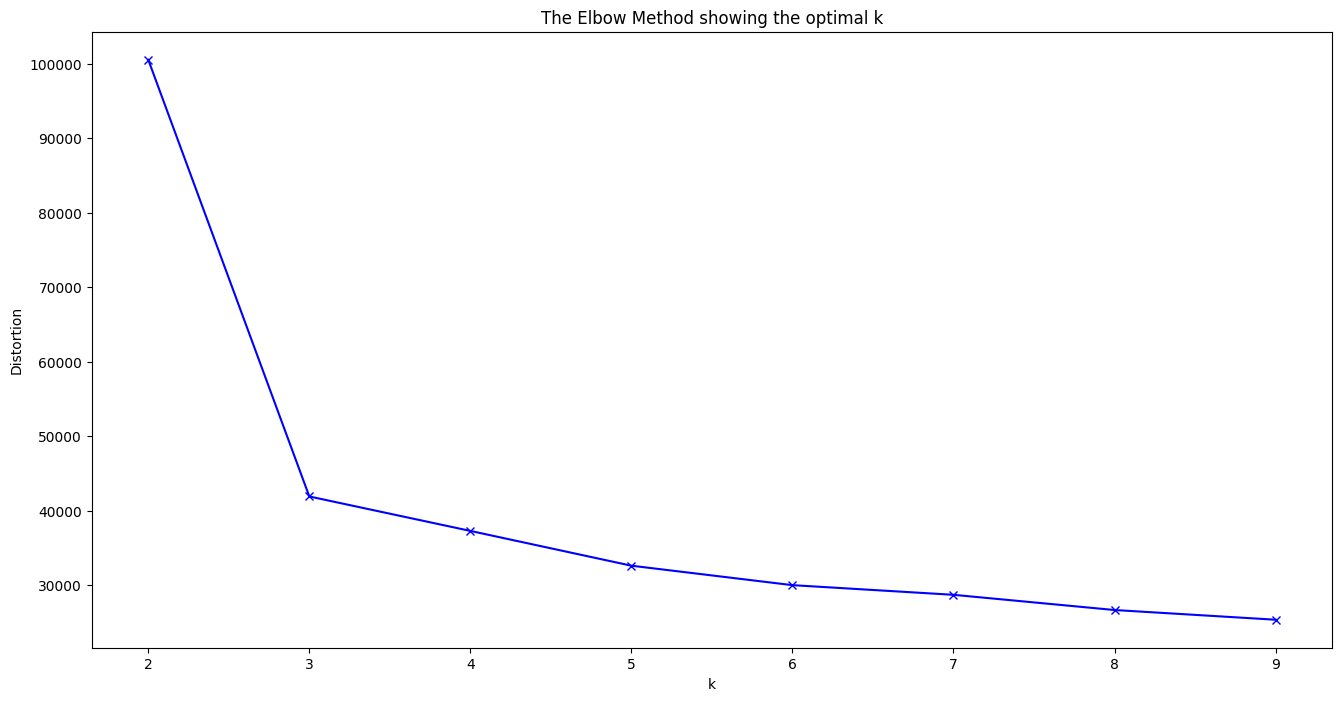

In [ ]:
# 7. Obtain plot of WSS (Within Sum of Squares) to check number of clusters.

distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()